In [1]:
import numpy as np
import scipy
import scipy.linalg
import matplotlib.pyplot as plt

from more_itertools import distinct_permutations

In [2]:
def sum_digits(n):
    s = 0
    while n:
        s += n % 10
        n //= 10
    return s

In [3]:
#First algorithm to find out basis vector for a particular state

def basis_sector_1(l : int, N: int):

    out = []
    Basis = np.linspace(0,2**N-1,num = 2**N ,dtype='int')

    for num in Basis:
        if sum_digits(int(bin(num)[2:])) == l:
            #print('True')
            out.append(num)
    out = np.array(out)
    return out

In [4]:
basis_sector_1(2,4)

array([ 3,  5,  6,  9, 10, 12])

In [5]:
#2nd algorithm 

def basis_sector_2(l : int, N:int):
    out = []
    init = [0]*(N-l)+[1]*l
    
    permutations = list(distinct_permutations(init))
    for i in permutations:
        out.append(int(''.join(map(str, i)),2)) #here 2 denotes the base of the number system

        
    out = np.array(out)
    return out

In [2]:
N = 10
import time
T = np.empty(N+1)
num = np.linspace(0,N,N+1)
print(num)
for l in range(N+1):
    start = time.time()
    basis_sector_1(l,N)
    end = time.time()
    T[l] = end-start

N1 = 10
T1 = np.empty(N1+1)
num1 = np.linspace(0,N1,N1+1)
print(num1)
for l in range(N1+1):
    start = time.time()
    basis_sector_2(l,N1)
    end = time.time()
    T1[l] = end-start

NameError: name 'np' is not defined

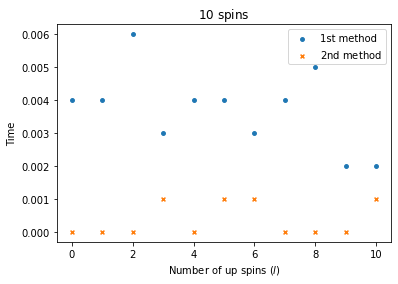

In [ ]:
fig, ax = plt.subplots()

ax.scatter(num, T, s=15,label = '1st method')
ax.scatter(num1, T1, s=15, label = '$2$nd method', marker='x' )
plt.title("$10$ spins")
ax.set_xlabel("Number of up spins ($l$)")
ax.set_ylabel("Time")

ax.legend(loc='best', fontsize = 'medium')


In [ ]:
N = 20
import time
T = np.empty(N+1)
num = np.linspace(0,N,N+1)
print(num)
for l in range(N+1):
    start = time.time()
    basis_sector_1(l,N)
    end = time.time()
    T[l] = end-start

N1 = 20
T1 = np.empty(N1+1)
num1 = np.linspace(0,N1,N1+1)
print(num1)
for l in range(N1+1):
    start = time.time()
    basis_sector_2(l,N1)
    end = time.time()
    T1[l] = end-start

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


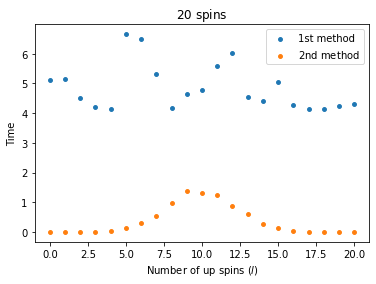

In [ ]:
fig, ax = plt.subplots()

ax.scatter(num, T, s=15,label = '1st method')
ax.scatter(num1, T1, s=15, label = '$2$nd method')
plt.title("$20$ spins")
ax.set_xlabel("Number of up spins ($l$)")
ax.set_ylabel("Time")

ax.legend(loc='best', fontsize = 'medium')

Generating the Hamiltonian for $N$ spins

In [6]:
def flip(a:int, i:int, j: int ,N):
    b = list(bin(a)[2:].zfill(N))
    b[i] , b[j] = b[j] , b[i]
    out = int(''.join(map(str, b)),2)

    return out
    

In [7]:
#algorithm presented in Sandvik for the whole Hamiltonian 

def H(N:int , J , D):
    out = np.zeros([2**N,2**N] ,dtype='complex_')
    for a in range(2**N):
        for i in range(N-1):
            #j = np.mod(i+1,N) #periodic boundary conditions, also have to replace i's range to N from N-1
            j = i+1 #closed boundary conditions
            test = bin(a)[2:].zfill(N)
            if test[i] == test[j]:
                out[a,a] += J * D /4 #for the spins aligned in the same direction
            else:
                out[a,a] -= J * D /4 #for the spins aligned in opposite direction
                b= flip(a,i,j,N)
                out[a,b] = J/2
    
    return out

In [8]:
H(2,1,1)

array([[ 0.25+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
       [ 0.  +0.j, -0.25+0.j,  0.5 +0.j,  0.  +0.j],
       [ 0.  +0.j,  0.5 +0.j, -0.25+0.j,  0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.25+0.j]])

In [9]:
#algorithm presented in Sandvik for the different sectors of the Hamiltonian 

def H_sec(N:int , l:int, J , D):
    basis_set = basis_sector_2(l,N)
    out = np.zeros([basis_set.size,basis_set.size] ,dtype='complex_') #presetting an empty matrix 
    #print(out)
    for x,a in enumerate(basis_set):
        for i in range(N-1):
            #print(x)
            #j = np.mod(i+1,N) #periodic boundary condition, also have to replace i's range to N from N-1
            j = i+1 #closed boundary condition
            test = bin(a)[2:].zfill(N)
            if test[i] == test[j]:
                out[x,x] += J * D /4 #for the spins aligned in the same direction
            else:
                out[x,x] -= J * D /4 #for the spins aligned in opposite direction
                b= flip(a,i,j,N) #flipping the neighboring spins for 
                                #generating another basis from the basis set
                
                k = np.where(basis_set ==b) #finding out the index of the basis from the earlier
                                            #operation of flipping neighboring spins
                s = k[0][0]
                out[x,s] = J/2
    
    return out

In [10]:
basis_sector_2(1,4)

array([1, 2, 4, 8])

In [11]:
H_sec(4,1,1,1)

array([[ 0.25+0.j,  0.5 +0.j,  0.  +0.j,  0.  +0.j],
       [ 0.5 +0.j, -0.25+0.j,  0.5 +0.j,  0.  +0.j],
       [ 0.  +0.j,  0.5 +0.j, -0.25+0.j,  0.5 +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.5 +0.j,  0.25+0.j]])

In [14]:
H_sec(17,9,1,1)

MemoryError: Unable to allocate 8.81 GiB for an array with shape (24310, 24310) and data type complex128